# In questo file andiamo a fare il task di clusterizzazione

In [1]:
# for basic mathematics operation 
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from yellowbrick.cluster import SilhouetteVisualizer
import random

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "none"


# Adesso vado a caricare il dataset ma solo con le due colonne d'interesse

In [4]:
data = pd.read_csv('DataSet\out.csv')
#display(data.head())

# take only annual income and spending score
x = data.iloc[:, [0,8,9,13]].values

# let's check the shape of x
print(x.shape)


(2190888, 4)


# Devo fare ETL, devo eliminare i valore Nan nel dataset

In [2]:
import os
from scipy import stats
import math

# Cambio della cartella attuale nella cartella in cui si trova il file .py
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

path_cartella = r"\archive\csvs_per_year\csvs_per_year"

path = path_file + path_cartella

c:\Users\pc\Desktop\Università\Data science\Progetti\ProgettoPython\DataScience2Project


# Per comodità carico direttamente tutti i file

In [3]:
# Vado a caricare tutte le tabelle del mio dataset

madrid2008 = pd.read_csv(path+"\madrid_2008.csv")
madrid2009 = pd.read_csv(path+"\madrid_2009.csv")
madrid2010 = pd.read_csv(path+"\madrid_2010.csv")
madrid2011 = pd.read_csv(path+"\madrid_2011.csv")
madrid2012 = pd.read_csv(path+"\madrid_2012.csv")
madrid2013 = pd.read_csv(path+"\madrid_2013.csv")
madrid2014 = pd.read_csv(path+"\madrid_2014.csv")
madrid2015 = pd.read_csv(path+"\madrid_2015.csv")
madrid2016 = pd.read_csv(path+"\madrid_2016.csv")
madrid2017 = pd.read_csv(path+"\madrid_2017.csv")
madrid2018 = pd.read_csv(path+"\madrid_2018.csv")
station = pd.read_csv('DataSet\stations.csv')
out = pd.read_csv('DataSet\out.csv')
display(out.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190888 entries, 0 to 2190887
Data columns (total 14 columns):
 #   Column   Dtype  
---  ------   -----  
 0   date     object 
 1   BEN      float64
 2   CO       float64
 3   EBE      float64
 4   NMHC     float64
 5   NO       float64
 6   NO_2     float64
 7   O_3      float64
 8   PM10     float64
 9   PM25     float64
 10  SO_2     float64
 11  TCH      float64
 12  TOL      float64
 13  station  int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 234.0+ MB


None

# Per ogni anno e per ogni stazione calcolo la media troncata e la sostituisco ai valori Nan

In [26]:
full1 = pd.Series()
time=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']
for d in time:
    full1Year = pd.Series()
    madrid = pd.read_csv(path+"\madrid_"+d+".csv")
    stazioni = madrid['station'].unique()
    #display(stazioni)
    for y in stazioni:
        onlyOne=madrid[madrid["station"].astype(str).str.contains(str(y))]
        copy = onlyOne.copy()
        newValue= stats.trim_mean(copy['PM10'].dropna().values,0.05) # La faccio qui
        onlyOne = onlyOne['PM10'].fillna(newValue) # Questo mette la media al posto dei nulli

        '''if(not math.isnan(newValue)):
             full1 = pd.concat([full1,onlyOne])'''
        if(True):
            full1Year = pd.concat([full1Year,onlyOne])
    if(full1Year.isna().sum() != 0):
        copy = full1Year.copy()
        newValue= stats.trim_mean(copy.dropna().values,0.05)
        full1Year = full1Year.fillna(newValue)
        full1 = pd.concat([full1,full1Year])
    else:
        full1 = pd.concat([full1,full1Year])

    #full1 = pd.concat([full1,full1Year])
    

df = full1.to_frame(name='PM10')
display(df.isna().sum())
display(df.count())

display(df.head(10))

C:\Users\pc\AppData\Local\Temp\ipykernel_7064\2083275611.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full1 = pd.Series()
C:\Users\pc\AppData\Local\Temp\ipykernel_7064\2083275611.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full1Year = pd.Series()
C:\Users\pc\AppData\Local\Temp\ipykernel_7064\2083275611.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full1Year = pd.Series()
C:\Users\pc\AppData\Local\Temp\ipykernel_7064\2083275611.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full1Year = pd.Series()
C:\U

PM10    0
dtype: int64

PM10    2190888
dtype: int64

,PM10
0,16.889999
26,23.740000
52,21.379999
78,8.330000
104,21.520000
130,12.600000
156,10.920000
182,13.130000
208,10.710000
234,8.740000


# Questa sezione serve solo per generare una situazione anomala

In [27]:
full2 = pd.Series()
time=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']
for d in time:
    full2Year = pd.Series()
    madrid = pd.read_csv(path+"\madrid_"+d+".csv")
    stazioni = madrid['station'].unique()
    #display(stazioni)
    for y in stazioni:
        onlyOne=madrid[madrid["station"].astype(str).str.contains(str(y))]
        copy = onlyOne.copy()
        newValue= stats.trim_mean(copy['PM25'].dropna().values,0.05) # La faccio qui
        onlyOne = onlyOne['PM25'].fillna(newValue) # Questo mette la media al posto dei nulli

        '''if(not math.isnan(newValue)):
             full1 = pd.concat([full1,onlyOne])'''
        if(True):
            full2Year = pd.concat([full2Year,onlyOne])
    if(full2Year.isna().sum() != 0):
        copy = full2Year.copy()
        newValue= stats.trim_mean(copy.dropna().values,0.05)
        full2Year = full2Year.fillna(newValue)
        full2 = pd.concat([full2,full2Year])
    else:
        full2 = pd.concat([full2,full2Year])

    #full1 = pd.concat([full1,full1Year])
    

df2 = full2.to_frame(name='PM25')
display(df2.isna().sum())
display(df2.count())

display(df2.head(10))

C:\Users\pc\AppData\Local\Temp\ipykernel_7064\3039394821.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full2 = pd.Series()
C:\Users\pc\AppData\Local\Temp\ipykernel_7064\3039394821.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full2Year = pd.Series()
C:\Users\pc\AppData\Local\Temp\ipykernel_7064\3039394821.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full2Year = pd.Series()
C:\Users\pc\AppData\Local\Temp\ipykernel_7064\3039394821.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full2Year = pd.Series()
C:\U

PM25    0
dtype: int64

PM25    2190888
dtype: int64

,PM25
0,10.40
26,13.69
52,12.16
78,5.69
104,12.93
130,7.37
156,7.46
182,8.87
208,6.66
234,4.79


# Cluster per errore


(2190888, 2)


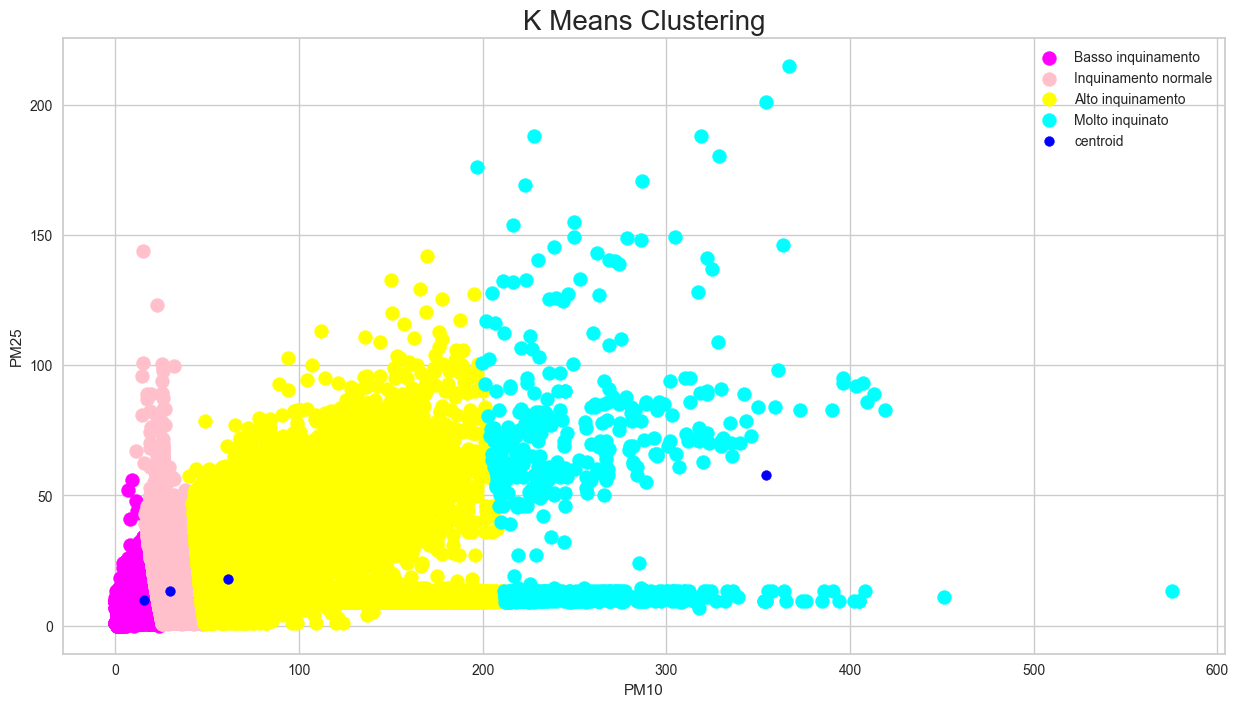

: 

In [48]:
# take only annual income and spending score
a = pd.DataFrame(data={'PM10':df['PM10'],'PM25':df2['PM25']})
x = a.iloc[:, [0, 1]].values

# let's check the shape of x
print(x.shape)

km = KMeans(n_clusters = 4, init = 'random', max_iter = 2, n_init = 5, random_state = 0)
y_means = km.fit_predict(x)

plt.figure(figsize=(15,8))
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'magenta', label = 'Basso inquinamento')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'pink', label = 'Inquinamento normale')
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'yellow', label = 'Alto inquinamento')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Molto inquinato')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('PM10')
plt.ylabel('PM25')
plt.legend()
plt.show()

# Lavoro sul secondo elemento

In [3]:
full2 = pd.DataFrame()
silhouette = True


time=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']#,'2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'
for d in time:
    if(['2008','2009','2010'].__contains__(d)):
        a=10
        b=13
    if(['2011','2012','2013','2014','2015','2016'].__contains__(d)):
        a=8
        b=10
    if(['2017','2018'].__contains__(d)):
        a=10
        b=12
    full2Year = pd.DataFrame()
    madrid = pd.read_csv(path+"\madrid_"+d+".csv")
    stazioni = madrid['station'].unique()
    #display(stazioni)
    for y in stazioni:
        onlyOne=madrid[madrid["station"].astype(str).str.contains(str(y))].iloc[:,[a,b]]
        copy = onlyOne.copy()
        newValue1= stats.trim_mean(copy['SO_2'].dropna().values,0.05) # La faccio qui
        newValue2= stats.trim_mean(copy['PM10'].dropna().values,0.05)
        onlyOne['SO_2'] = onlyOne['SO_2'].fillna(newValue1) # Questo mette la media al posto dei nulli
        onlyOne['PM10'] = onlyOne['PM10'].fillna(newValue2) # Questo mette la media al posto dei nulli

        if(onlyOne['PM10'].isna().sum() == 0 and onlyOne['SO_2'].isna().sum() == 0):
            full2Year = pd.concat([full2Year,onlyOne])

    if(silhouette): # Qui introduco la randomizzazione per ogni anno
        list = random.sample(range(0,full2Year.count().max()),5000)
        full2Year = full2Year.iloc[list]
    full2 = pd.concat([full2,full2Year],ignore_index=True)
    

#df2 = full2.to_frame(name='SO_2')
display(full2.isna().sum())
display(full2.count())

display(full2.head(10))

PM10    0
SO_2    0
dtype: int64

PM10    55000
SO_2    55000
dtype: int64

,PM10,SO_2
0,19.435912,8.312944
1,78.290001,27.620001
2,50.810001,7.840000
3,11.020000,6.120000
4,12.240000,4.780000
5,7.390000,7.140000
6,10.500000,5.900000
7,5.020000,16.860001
8,13.410000,7.370000
9,8.550000,6.720000


# Qui vado a fare le operazioni per calcolare il K migliore

In [4]:
distortions = []
#x = pd.DataFrame(data={'NO_2':df['NO_2'],'SO_2':df2['SO_2']})
clustering1 = full2.iloc[:,[0,1]].values
full2.info()

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(clustering1)
    distortions.append(km.inertia_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    55000 non-null  float64
 1   SO_2    55000 non-null  float64
dtypes: float64(2)
memory usage: 859.5 KB


# Stampo il grafico

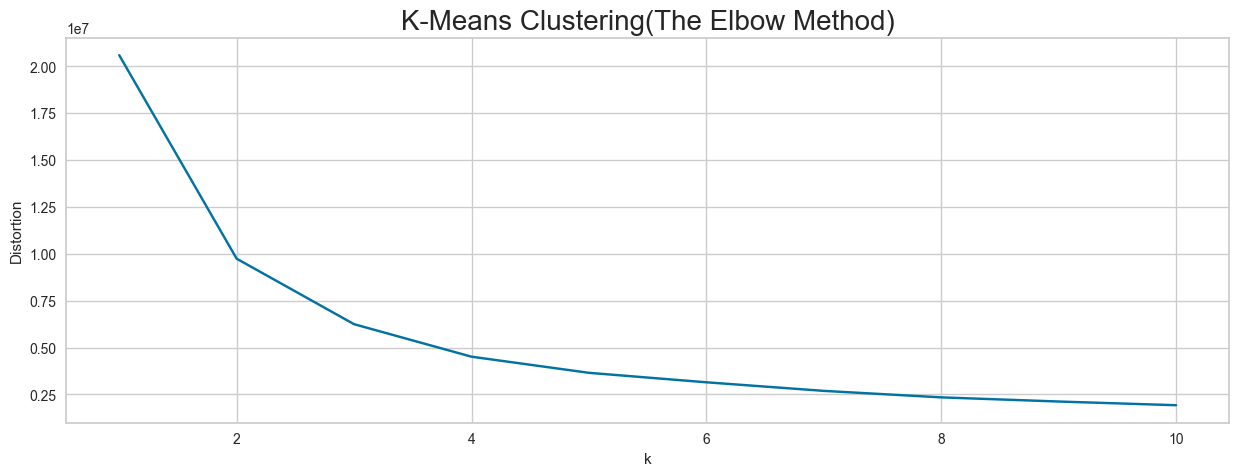

In [5]:
plt.figure(figsize=(15,5))
plt.plot(range(1, 11), distortions)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

# Prova di clustering

(55000, 2)


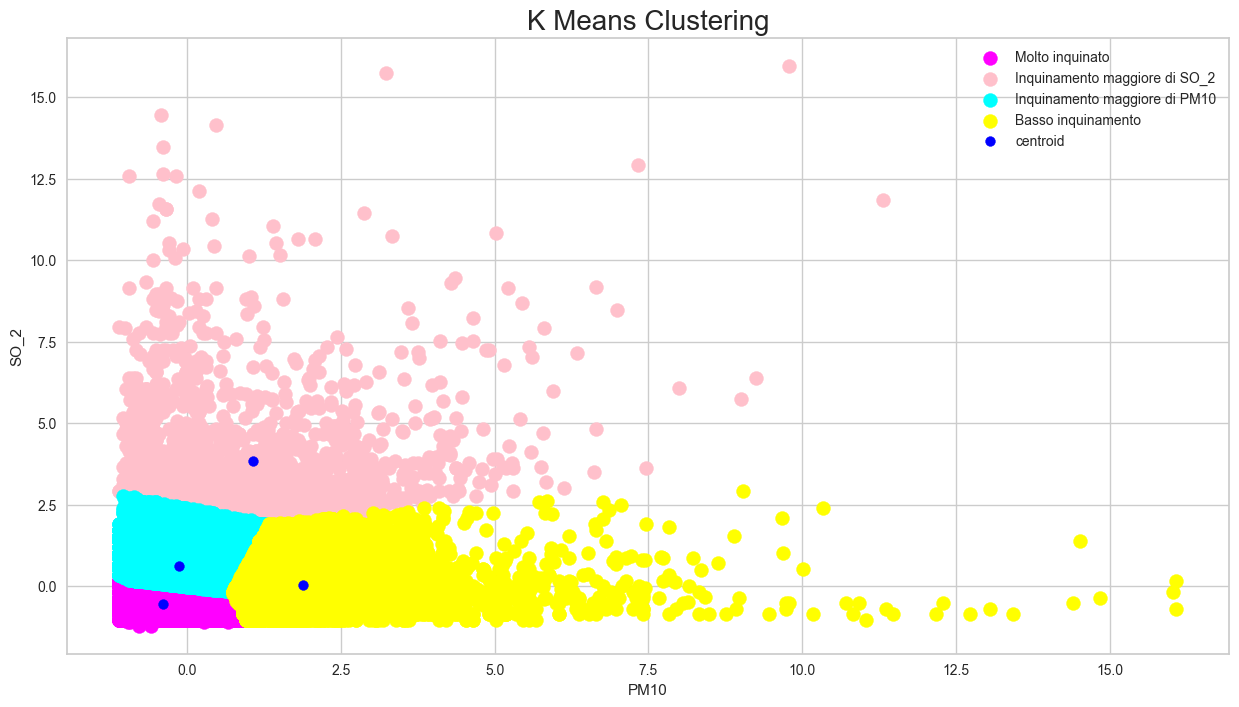

In [6]:
#x = pd.DataFrame(data={'PM10':df['PM10'],'PM25':df2['PM25']}) #doppione
import random
#list = random.sample(range(1,full2.count().max()),50000)
#display(list)
clustering1 = full2.iloc[:,[0,1]].values # Senza random
scaler = StandardScaler()
scaler.fit(clustering1)
StandardScaler()
clustering1 = scaler.transform(clustering1)

print(clustering1.shape)
from sklearn.cluster import KMeans


km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(clustering1)

plt.figure(figsize=(15,8))
plt.scatter(clustering1[y_means == 1, 0], clustering1[y_means == 1, 1], s = 100, c = 'magenta', label = 'Molto inquinato')
plt.scatter(clustering1[y_means == 3, 0], clustering1[y_means == 3, 1], s = 100, c = 'pink', label = 'Inquinamento maggiore di SO_2')
plt.scatter(clustering1[y_means == 2, 0], clustering1[y_means == 2, 1], s = 100, c = 'cyan', label = 'Inquinamento maggiore di PM10')
plt.scatter(clustering1[y_means == 0, 0], clustering1[y_means == 0, 1], s = 100, c = 'yellow', label = 'Basso inquinamento')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('PM10')
plt.ylabel('SO_2')
plt.legend()
plt.show()

# Clustering troncato

In [10]:

dataset = pd.read_csv("DataSet\out.csv")
dataset['date'] = pd.to_datetime(dataset['date'])
dataset.set_index('date')

#NO_2,PM10
#
dataset.info()
pre_clustering1 = dataset.loc[(dataset['NO_2'].notnull()) & (dataset['SO_2'].notnull())]
display(pre_clustering1.info())
clusteringLeo = pre_clustering1.iloc[:,[6,10]].values
display(clusteringLeo.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190888 entries, 0 to 2190887
Data columns (total 14 columns):
 #   Column   Dtype         
---  ------   -----         
 0   date     datetime64[ns]
 1   BEN      float64       
 2   CO       float64       
 3   EBE      float64       
 4   NMHC     float64       
 5   NO       float64       
 6   NO_2     float64       
 7   O_3      float64       
 8   PM10     float64       
 9   PM25     float64       
 10  SO_2     float64       
 11  TCH      float64       
 12  TOL      float64       
 13  station  int64         
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 234.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166156 entries, 0 to 2190884
Data columns (total 14 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   date     1166156 non-null  datetime64[ns]
 1   BEN      415872 non-null   float64       
 2   CO       910060 non-null   float64       
 3 

None

(1166156, 2)

In [24]:
scaler = StandardScaler()
scaler.fit(clusteringLeo)
StandardScaler()
clusteringLeo = scaler.transform(clusteringLeo)

print(clusteringLeo.shape)
from sklearn.cluster import KMeans

'''wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(clusteringLeo)
    wcss.append(km.inertia_)'''

#plt.figure(figsize=(20,8))
#plt.plot(range(1, 11), wcss)
#plt.title('The Elbow Method', fontsize = 20)
#plt.xlabel('No. of Clusters')
#plt.ylabel('wcss')
#plt.show()

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(clusteringLeo)

plt.figure(figsize=(15,8))
plt.scatter(clusteringLeo[y_means == 0, 0], clusteringLeo[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(clusteringLeo[y_means == 1, 0], clusteringLeo[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(clusteringLeo[y_means == 2, 0], clusteringLeo[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(clusteringLeo[y_means == 3, 0], clusteringLeo[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

#pmAverageStation = datasetStation28079055['PM10'].resample('10d').mean()
#pmAverageStation.plot.line(x='date',y='PM25')
#plt.show()
#pmAverage = dataset['PM25'].resample('5d')
#pmAverage.plot.line(x='date',y='PM25')
#print(pmAverage)
#dataset.plot.line(x='date',y='PM25')
#plt.show()



NameError: name 'clusteringLeo' is not defined

# Lancio del clustering gerachico

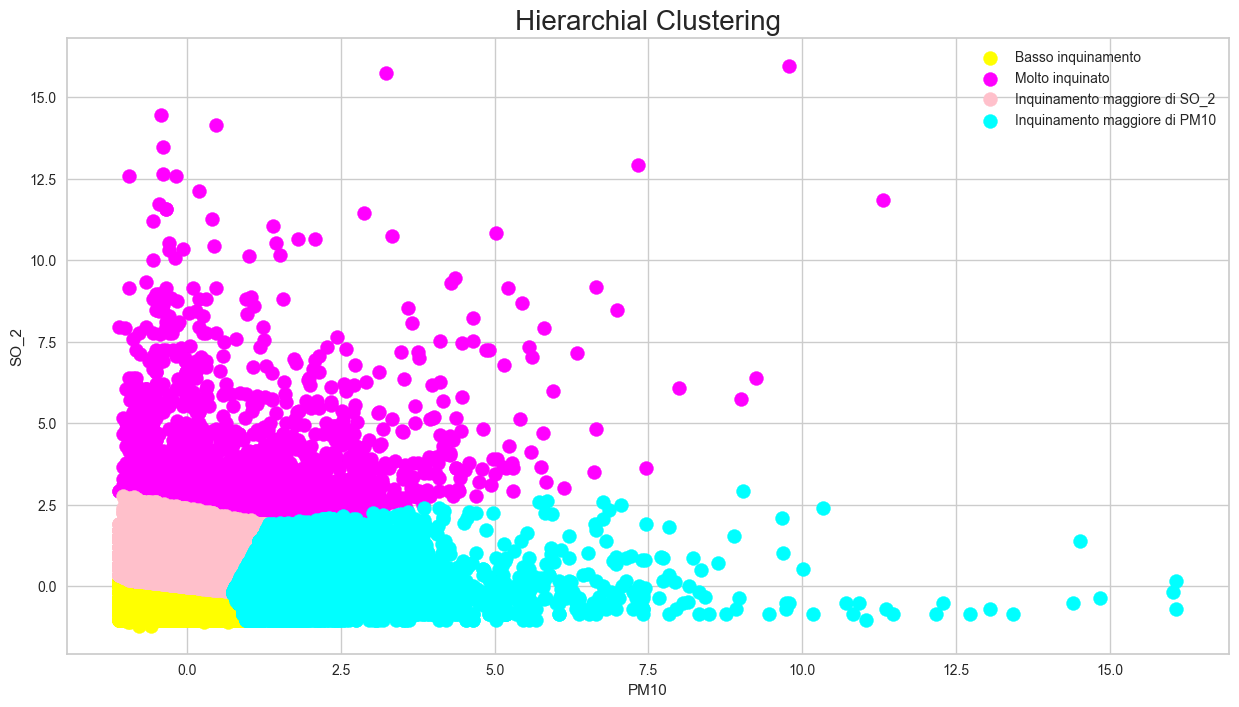

In [8]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(clustering1)

plt.figure(figsize=(15,8))
plt.scatter(clustering1[y_means == 1, 0], clustering1[y_means == 1, 1], s = 100, c = 'yellow', label = 'Basso inquinamento')
plt.scatter(clustering1[y_means == 3, 0], clustering1[y_means == 3, 1], s = 100, c = 'magenta', label = 'Molto inquinato')
plt.scatter(clustering1[y_means == 2, 0], clustering1[y_means == 2, 1], s = 100, c = 'pink', label = 'Inquinamento maggiore di SO_2')
plt.scatter(clustering1[y_means == 0, 0], clustering1[y_means == 0, 1], s = 100, c = 'cyan', label = 'Inquinamento maggiore di PM10')

plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('PM10')
plt.ylabel('SO_2')
plt.legend()
plt.show()

# Dataset per la PCA

In [7]:
full2 = pd.DataFrame()
silhouette = True


time=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']#,'2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'
for d in time:
    if(['2008','2009','2010'].__contains__(d)):
        lista=[6,7,10,11,13]
    if(['2011','2012','2013','2014','2015','2016'].__contains__(d)):
        lista=[5,6,8,9,10]
    if(['2017','2018'].__contains__(d)):
        lista=[6,7,10,11,12]

    full2Year = pd.DataFrame()
    madrid = pd.read_csv(path+"\madrid_"+d+".csv")
    stazioni = madrid['station'].unique()
    #display(stazioni)
    for y in stazioni:
        onlyOne=madrid[madrid["station"].astype(str).str.contains(str(y))].iloc[:,lista]
        if(['2008','2009','2010'].__contains__(d)):
            onlyOne['NO']= onlyOne['NOx']-onlyOne['NO_2']
            onlyOne=onlyOne.drop('NOx', axis=1)
        copy = onlyOne.copy()
        newValue1= stats.trim_mean(copy['SO_2'].dropna().values,0.05) # La faccio qui
        newValue2= stats.trim_mean(copy['PM10'].dropna().values,0.05)
        newValue3= stats.trim_mean(copy['PM25'].dropna().values,0.05)
        newValue4= stats.trim_mean(copy['NO'].dropna().values,0.05)
        newValue5= stats.trim_mean(copy['NO_2'].dropna().values,0.05)
        onlyOne['SO_2'] = onlyOne['SO_2'].fillna(newValue1) # Questo mette la media al posto dei nulli
        onlyOne['PM10'] = onlyOne['PM10'].fillna(newValue2) # Questo mette la media al posto dei nulli
        onlyOne['PM25'] = onlyOne['PM25'].fillna(newValue3)
        onlyOne['NO'] = onlyOne['NO'].fillna(newValue4)
        onlyOne['NO_2'] = onlyOne['NO_2'].fillna(newValue5)

        if(onlyOne['PM10'].isna().sum() == 0 and onlyOne['SO_2'].isna().sum() == 0 and onlyOne['PM25'].isna().sum() == 0
        and onlyOne['NO'].isna().sum() == 0 and onlyOne['NO_2'].isna().sum() == 0):
            full2Year = pd.concat([full2Year,onlyOne])

    if(silhouette): # Qui introduco la randomizzazione per ogni anno
        list = random.sample(range(0,full2Year.count().max()),5000)
        full2Year = full2Year.iloc[list]
    full2 = pd.concat([full2,full2Year],ignore_index=True)
    

#df2 = full2.to_frame(name='SO_2')
display(full2.isna().sum())
display(full2.count())

display(full2.head(10))

NO_2    0
PM10    0
PM25    0
SO_2    0
NO      0
dtype: int64

NO_2    55000
PM10    55000
PM25    55000
SO_2    55000
NO      55000
dtype: int64

,NO_2,PM10,PM25,SO_2,NO
0,37.360001,13.120000,5.590000,12.860000,17.880001
1,76.180000,26.760000,19.290001,14.720000,113.420006
2,55.790001,12.630000,10.060000,8.410000,28.790001
3,94.300003,38.410000,16.129999,8.720000,53.199997
4,48.509998,23.280001,16.030001,8.020000,32.480000
5,70.599998,53.480000,28.620001,7.580000,19.080002
6,63.700001,6.550000,2.470000,13.550000,38.799999
7,94.589996,33.830002,18.969999,22.530001,87.710007
8,41.070000,37.959999,10.860000,7.280000,11.810001
9,132.600006,33.660000,16.230000,18.270000,51.000000


Test della PCA

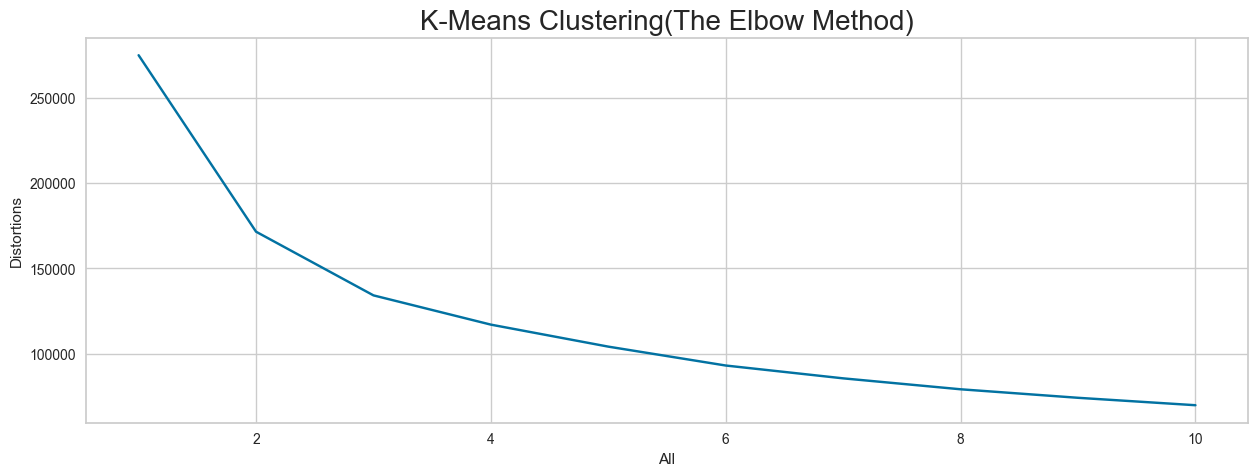

In [8]:
#pre_clustering1 = dataset.loc[(dataset['NO_2'].notnull()) & (dataset['SO_2'].notnull()) & (dataset['PM10'].notnull()) & (dataset['PM25'].notnull())]

#display(pre_clustering1.info())
clusteringLeo = full2.values
#sampleN = 2000
#clusteringLeo=clusteringLeo[random.sample(range(1,max(clusteringLeo.shape)),sampleN)] # Estrazione casuale di N campioni 
scaler = StandardScaler()
scaler.fit(clusteringLeo)
StandardScaler()
clusteringLeo = scaler.transform(clusteringLeo)

from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(clusteringLeo)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(15,5))
plt.plot(range(1, 11), distortions)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('All')
plt.ylabel('Distortions')
plt.show()

from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver="auto").fit(clusteringLeo)
pca_x = pca.transform(clusteringLeo)





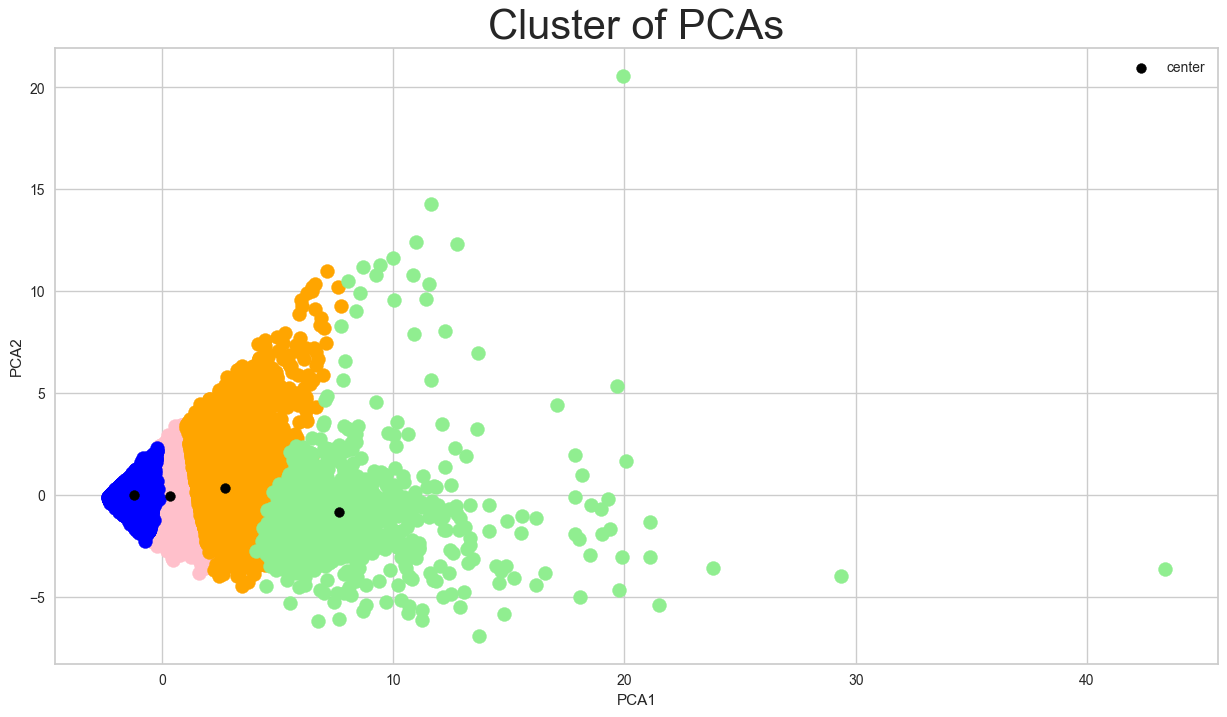

In [9]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(clusteringLeo)

plt.figure(figsize=(15,8))
plt.title('Cluster of PCAs', fontsize = 30)

plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
plt.scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'blue')
plt.scatter(pca_x[ymeans == 4, 0], pca_x[ymeans == 4, 1], s = 100, c = 'gray')
plt.scatter(pca_x[ymeans == 5, 0], pca_x[ymeans == 5, 1], s = 100, c = 'red')

centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s = 50, c = 'black', label="center")

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

# Test sul DBSCAN

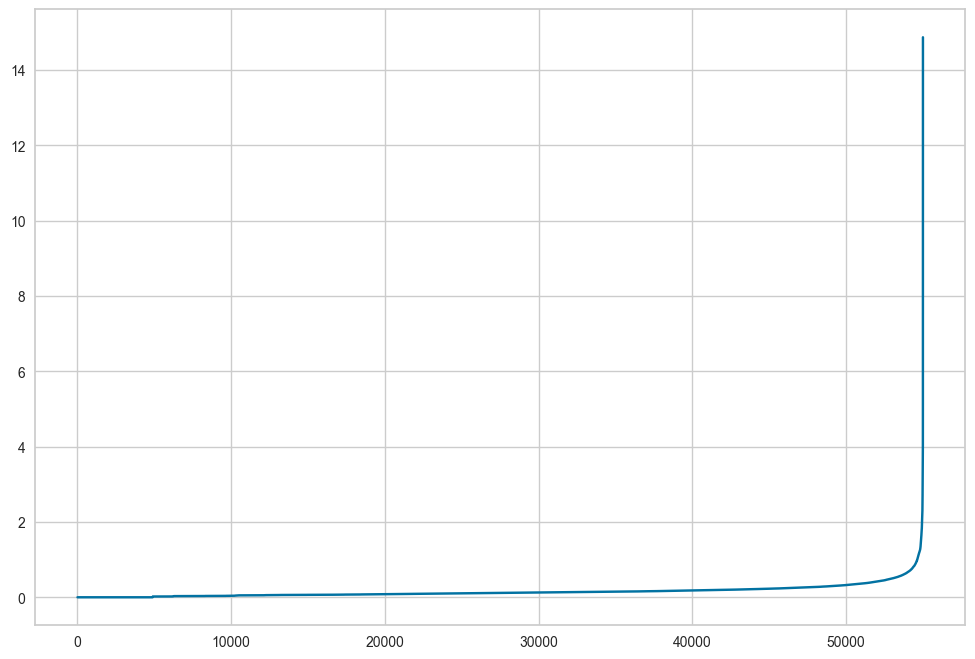

In [11]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import random

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(clusteringLeo)
distances, indices = nbrs.kneighbors(clusteringLeo)

distances = np.sort(distances, axis=0)
plt.figure(figsize=(12,8))
plt.plot(distances[:,1])

In [31]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1, min_samples=6).fit(clusteringLeo)
ymeans = db.labels_
ymeans

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


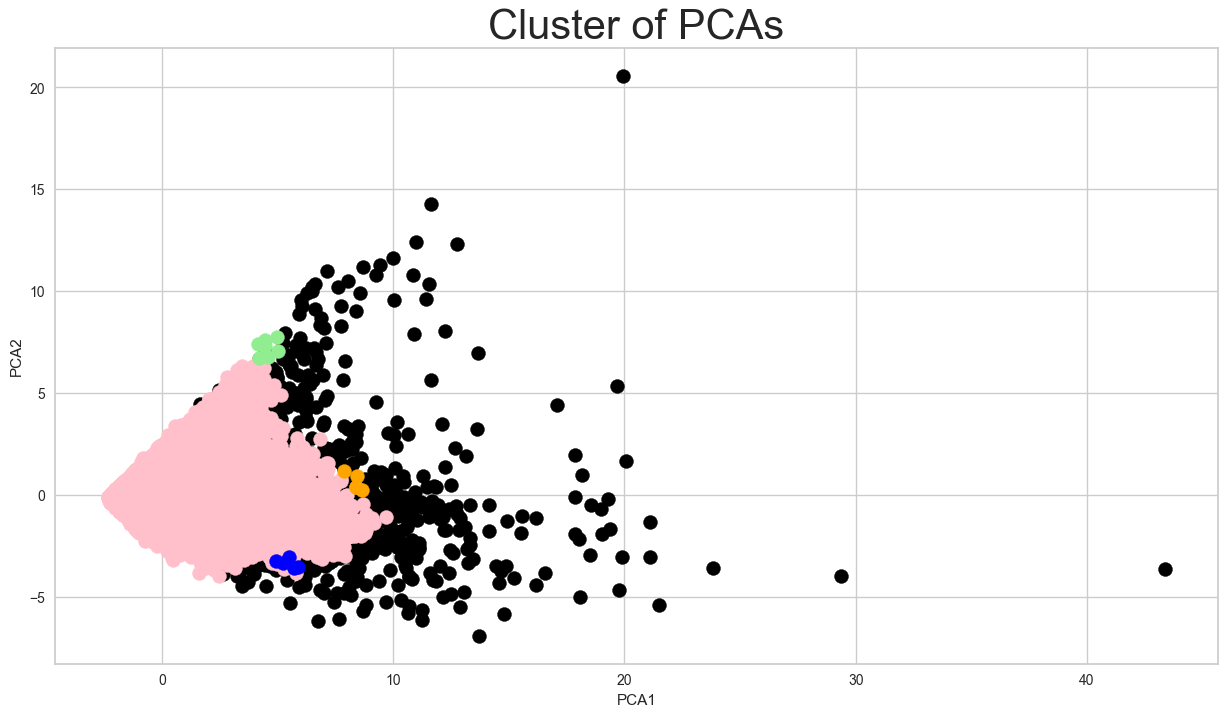

In [32]:
plt.figure(figsize=(15,8))
plt.title('Cluster of PCAs', fontsize = 30)

plt.scatter(pca_x[ymeans == -1, 0], pca_x[ymeans == -1, 1], s = 100, c = 'black')
plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
plt.scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'blue')
plt.scatter(pca_x[ymeans == 4, 0], pca_x[ymeans == 4, 1], s = 100, c = 'gray')
plt.scatter(pca_x[ymeans == 5, 0], pca_x[ymeans == 5, 1], s = 100, c = 'red')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

# Siloutte

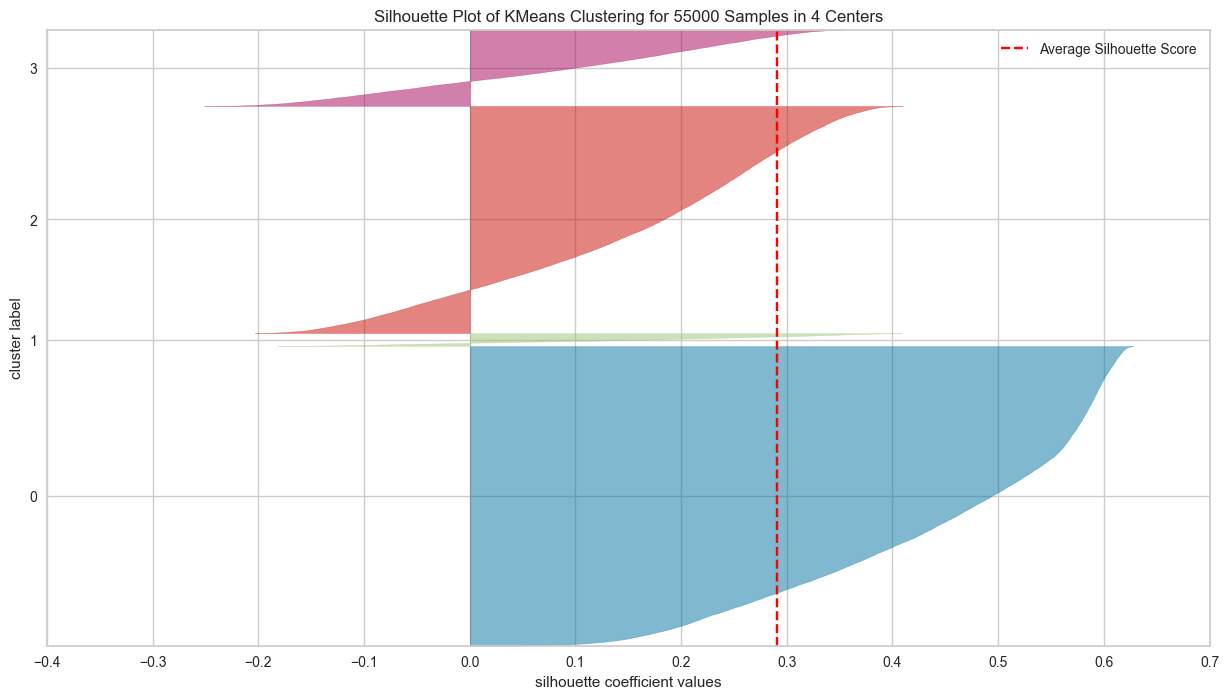

In [28]:
from yellowbrick.cluster import SilhouetteVisualizer


# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(clusteringLeo)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure